In [1]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo

# GOF extra sheet

Explain:
- Hypothesis testing, draw H0, H1, explain p-value, power etc.
- KS test statistic
- AD test statistic

## Generating dataset under H_0

In [2]:
N_sets = 10_000
n = 50

h0_mu = 0.
h0_sigma = 1.

data = []
h0_ks_tstatistic = []
h0_ks_pvalue = []

for i in range(N_sets):
    aa = sps.norm.rvs(loc = h0_mu, scale = h0_sigma, size = n)
    tt, pp = sps.kstest(aa, 'norm')
    
    data.append(aa)
    h0_ks_tstatistic.append(tt)
    h0_ks_pvalue.append(pp)
    
#?sps.kstwobign

Text(0, 0.5, 'No. datasets')

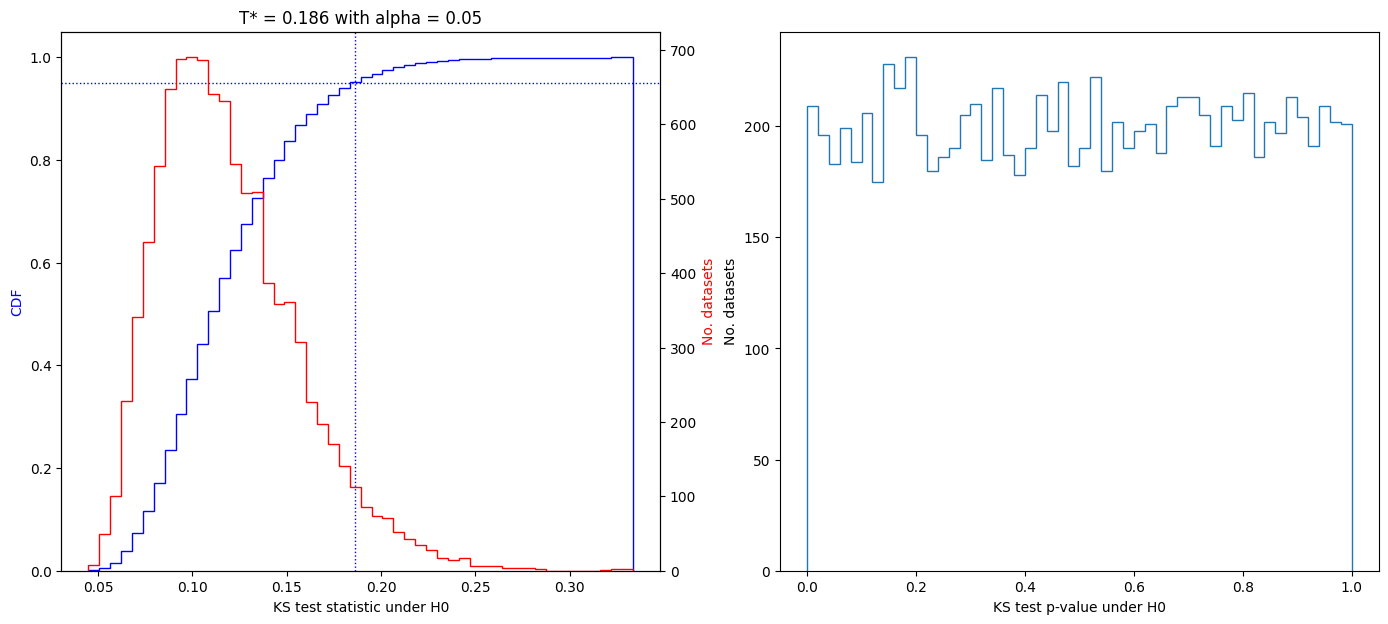

In [3]:
nbins = 50
fig = plt.figure(figsize=(17, 7), facecolor='w')

ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()

alpha = 0.05 # 5%
colour1 = 'b'
colour2 = 'r'
tmp = ax1.hist(h0_ks_tstatistic, color=colour1, histtype='step', bins=nbins, density=True, cumulative=True)

# calculate t_star
t_low = np.argwhere(tmp[0]>=(1-alpha))[0] # index of lower edge of bin
t_star = (tmp[1][t_low]+tmp[1][t_low+1])/2.
t_star = t_star[0]

#
ax1.set_ylabel('CDF', color=colour1)
ax1.axhline(1-alpha, color=colour1, lw=1, ls=':')
ax1.axvline(t_star, color=colour1, lw=1, ls=':')

ax2.set_ylabel('No. datasets', color=colour2)
ax2.hist(h0_ks_tstatistic, color=colour2, histtype='step', bins=nbins)

ax1.set_xlabel('KS test statistic under H0')
ax1.set_title(f'T* = {t_star:.3f} with alpha = {alpha}')

#tmp = plt.hist(h0_ks_tstatistic, histtype='step', bins=nbins)
#cnt = tmp[0]
#edges = tmp[1]


plt.subplot(122)
plt.hist(h0_ks_pvalue, histtype='step', bins=nbins)
plt.xlabel('KS test p-value under H0')
plt.ylabel('No. datasets')

Text(0.5, 1.0, 'KS distribution')

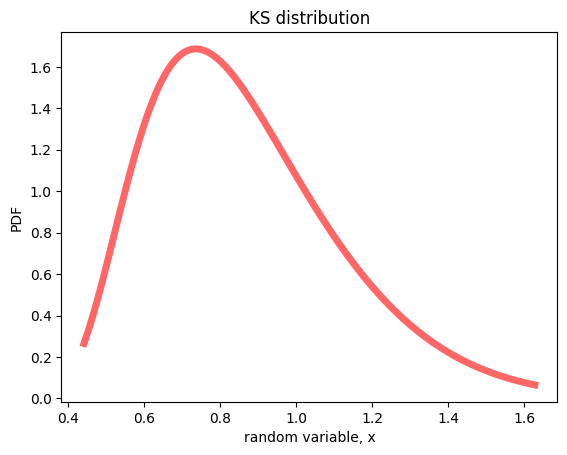

In [4]:
# Just to visualise how things look like
x = np.linspace(sps.kstwobign.ppf(0.01),
                sps.kstwobign.ppf(0.99), 100)
plt.plot(x, sps.kstwobign.pdf(x), 'r-', lw=5, alpha=0.6, label='kstwobign pdf')
plt.xlabel('random variable, x')
plt.ylabel('PDF')
plt.title('KS distribution')

## KS test statistic distribution under H1

In [5]:
def toy_ks_h1(this_mu=h0_mu, this_sigma=h0_sigma, num_toys=10_000, num_events=50): 
    data = []
    ks_tstatistic = []
    ks_pvalue = []

    for i in range(num_toys):
        aa = sps.norm.rvs(loc=this_mu, scale = this_sigma, size = num_events)
        tt, pp = sps.kstest(aa, 'norm')

        data.append(aa)
        ks_tstatistic.append(tt)
        ks_pvalue.append(pp)
    
    return data, ks_tstatistic, ks_pvalue

## H1's of different means

In [6]:
N_sets = 10_000
n = 50

h1_mu = np.linspace(-1., 1., 11)
#h1_mu = np.linspace(-1., 1., 4) # don't want zero cause that's H0
h1_sigma = 1.

h1_data = []
h1_ks_tstatistic = []
h1_ks_pvalue = []
h1_ks_power = []

for this_mu in h1_mu:
    dd, tt, pp = toy_ks_h1(this_mu, h1_sigma, N_sets, n)
    
    h1_data.append(dd)
    h1_ks_tstatistic.append(tt)
    h1_ks_pvalue.append(pp)
    
    h1_ks_power.append(np.sum(tt>t_star)/len(tt))

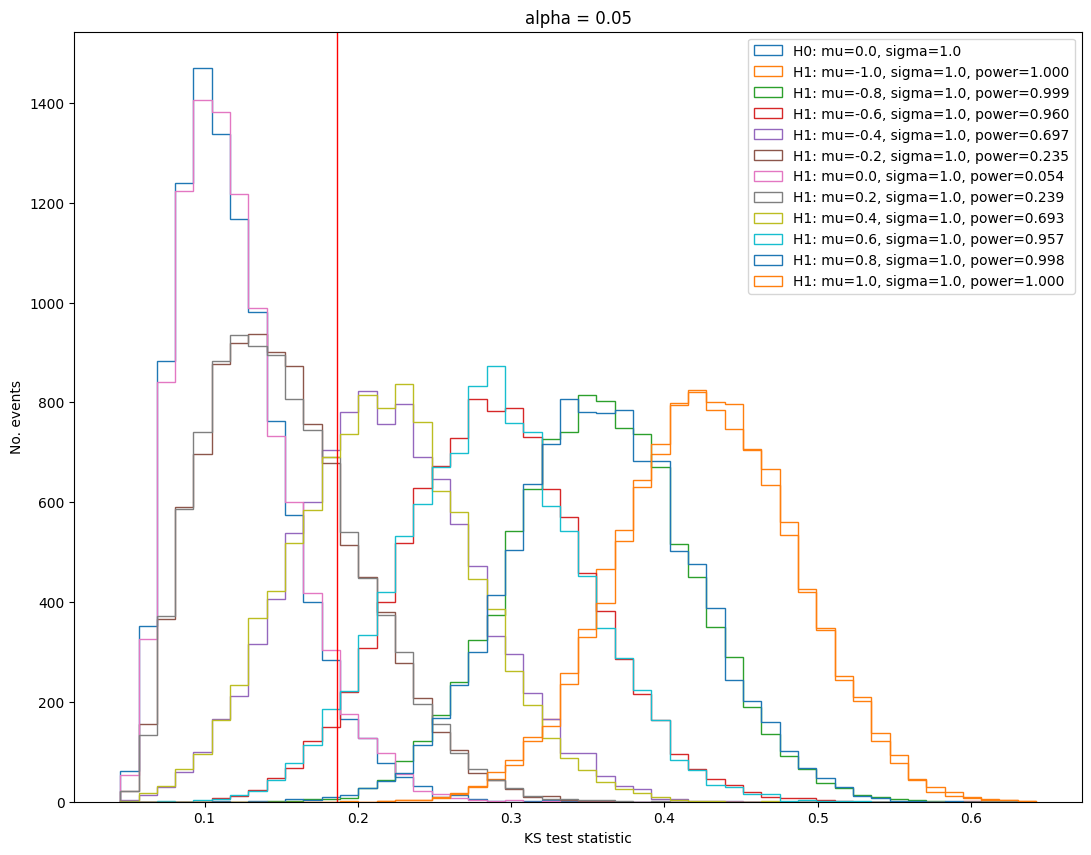

In [7]:
nbins = 50

bin_low = min(min(h0_ks_tstatistic), min(min(h1_ks_tstatistic)))
bin_high = max(max(h0_ks_tstatistic), max(max(h1_ks_tstatistic)))
bin_edges = np.linspace(bin_low, bin_high, nbins+1)

plt.figure(figsize=(13, 10), facecolor='w')
plt.hist(h0_ks_tstatistic, bins=bin_edges, histtype='step', label=f'H0: mu={h0_mu:.1f}, sigma={h0_sigma:.1f}')

for ind_mu, this_mu in enumerate(h1_mu):
    plt.hist(h1_ks_tstatistic[ind_mu], bins=bin_edges, histtype='step', \
             label=f'H1: mu={this_mu:.1f}, sigma={h1_sigma:.1f}, power={h1_ks_power[ind_mu]:.3f}')

plt.axvline(t_star, lw=1, c='r')

plt.xlabel('KS test statistic')
plt.ylabel('No. events')
plt.title(f'alpha = {alpha}')
plt.legend()

Text(0, 0.5, 'Power')

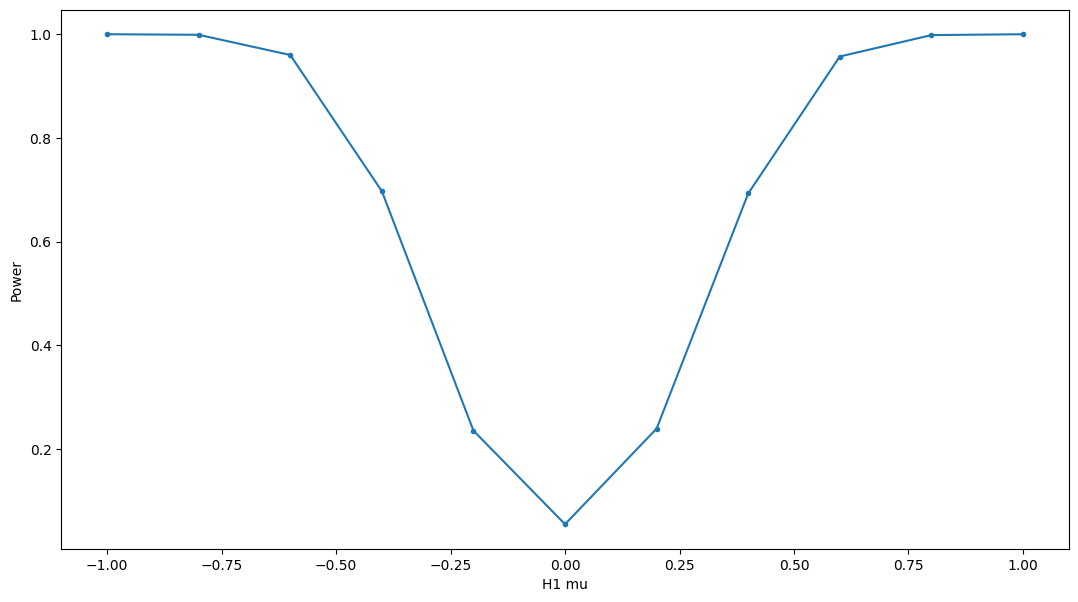

In [8]:
plt.figure(figsize=(13, 7), facecolor='w')
plt.plot(h1_mu, h1_ks_power, '.-')
plt.xlabel('H1 mu')
plt.ylabel('Power')

## H1's of different standard deviations

In [9]:
N_sets = 10_000
n = 50

h2_mu = 0.
h2_sigma = np.linspace(0.5, 2, 7) # don't want zero cause that's H0

h2_data = []
h2_ks_tstatistic = []
h2_ks_pvalue = []
h2_ks_power = []

for this_sigma in h2_sigma:
    dd, tt, pp = toy_ks_h1(h2_mu, this_sigma, N_sets, n)
    
    h2_data.append(dd)
    h2_ks_tstatistic.append(tt)
    h2_ks_pvalue.append(pp)
    h2_ks_power.append(np.sum(tt>t_star)/len(tt))

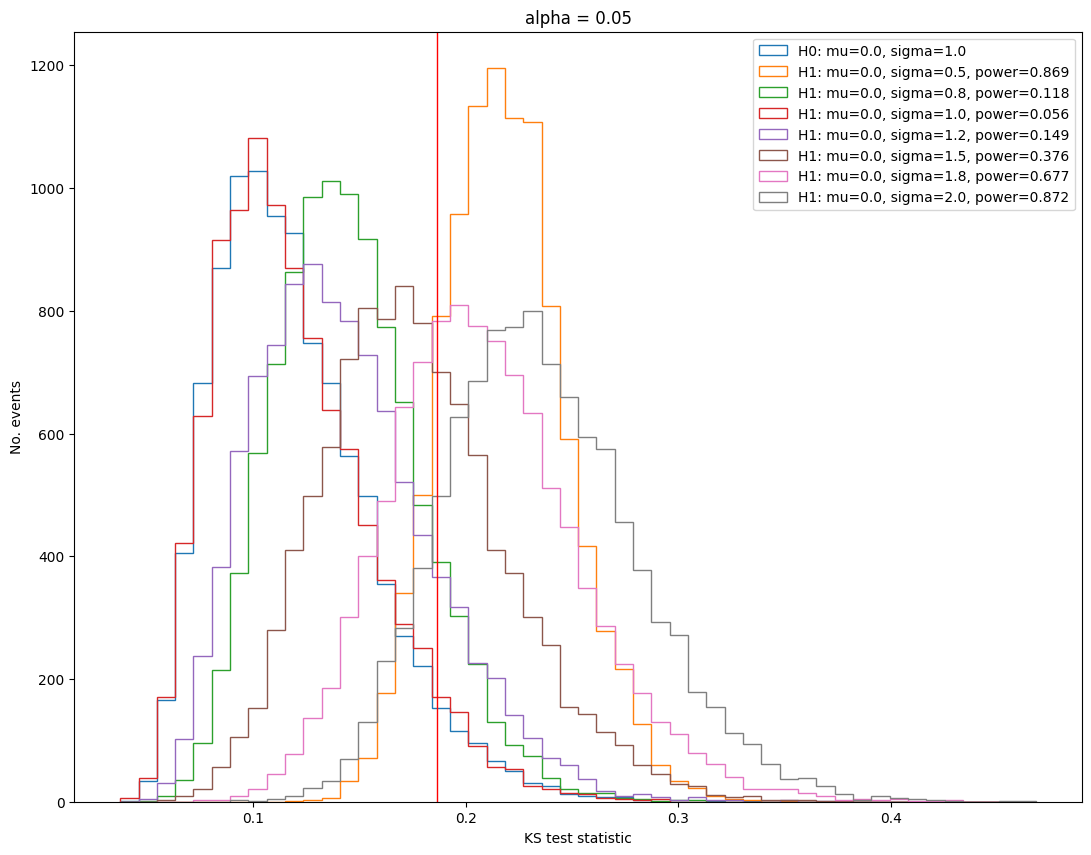

In [10]:
nbins = 50

bin_low = min(min(h0_ks_tstatistic), min(min(h2_ks_tstatistic)))
bin_high = max(max(h0_ks_tstatistic), max(max(h2_ks_tstatistic)))
bin_edges = np.linspace(bin_low, bin_high, nbins+1)

plt.figure(figsize=(13, 10), facecolor='w')
plt.hist(h0_ks_tstatistic, bins=bin_edges, histtype='step', label=f'H0: mu={h0_mu:.1f}, sigma={h0_sigma:.1f}')

for ind_sigma, this_sigma in enumerate(h2_sigma):
    plt.hist(h2_ks_tstatistic[ind_sigma], bins=bin_edges, histtype='step', \
             label=f'H1: mu={h2_mu:.1f}, sigma={this_sigma:.1f}, power={h2_ks_power[ind_sigma]:.3f}')

plt.axvline(t_star, lw=1, c='r')

plt.xlabel('KS test statistic')
plt.ylabel('No. events')
plt.title(f'alpha = {alpha}')
plt.legend()

Text(0, 0.5, 'Power')

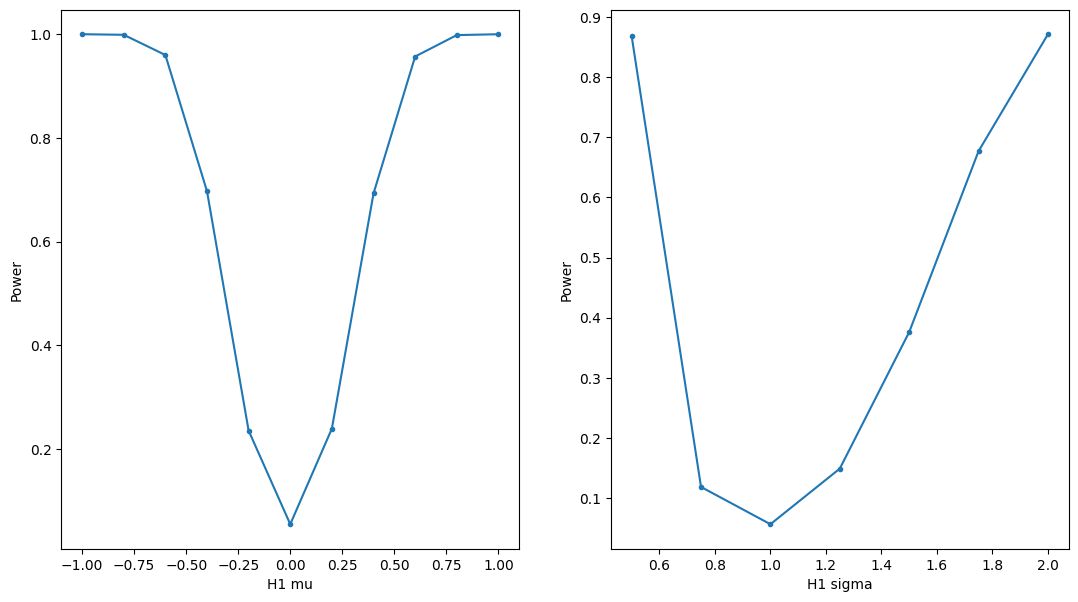

In [11]:
plt.figure(figsize=(13, 7), facecolor='w')

plt.subplot(121)
plt.plot(h1_mu, h1_ks_power, '.-')
plt.xlabel('H1 mu')
plt.ylabel('Power')

plt.subplot(122)
plt.plot(h2_sigma, h2_ks_power, '.-')
plt.xlabel('H1 sigma')
plt.ylabel('Power')